In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#### EXPLORATORY DATA ANALYSIS

In the Exploratory Data Analysis (EDA), following things have been done:<br/>
    - Data Loading, checking the dataset, data-types, and the shape of the dataset<br/>
    - Checking for missing values, if any, then imputing them<br/>
    - Plotting the distribution of all the columns in the dataset<br/>
    - Using the StandardScaler to scale the data<br/>
    - Plotting the scatter plot of the dataset to see the distribution of the scaled data<br/>
    - Using the z-score metric to detect the outliers in the dataset<br/>
    - Plotting the outliers using the scatter plot<br/>
    - Removing the outliers from the dataset<br/>
    - Finding the correlation between the features, and based on the correlation between the features, performing feature engineering and feature elimination<br/>

In [2]:
# reading the dataset in a dataframe using Pandas
df = pd.read_csv('Frogs_MFCCs.csv')
print(df.shape)
print(df.columns)
df.head()

(7195, 26)
Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species', 'RecordID'],
      dtype='object')


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [3]:
df.dtypes

MFCCs_ 1    float64
MFCCs_ 2    float64
MFCCs_ 3    float64
MFCCs_ 4    float64
MFCCs_ 5    float64
MFCCs_ 6    float64
MFCCs_ 7    float64
MFCCs_ 8    float64
MFCCs_ 9    float64
MFCCs_10    float64
MFCCs_11    float64
MFCCs_12    float64
MFCCs_13    float64
MFCCs_14    float64
MFCCs_15    float64
MFCCs_16    float64
MFCCs_17    float64
MFCCs_18    float64
MFCCs_19    float64
MFCCs_20    float64
MFCCs_21    float64
MFCCs_22    float64
Family       object
Genus        object
Species      object
RecordID      int64
dtype: object

In [4]:
print(df.isna().sum())
print(df.isnull().sum())

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64
MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
Family      0
Genus       0
Species     0
RecordID    0
dtype: int64


In [5]:
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


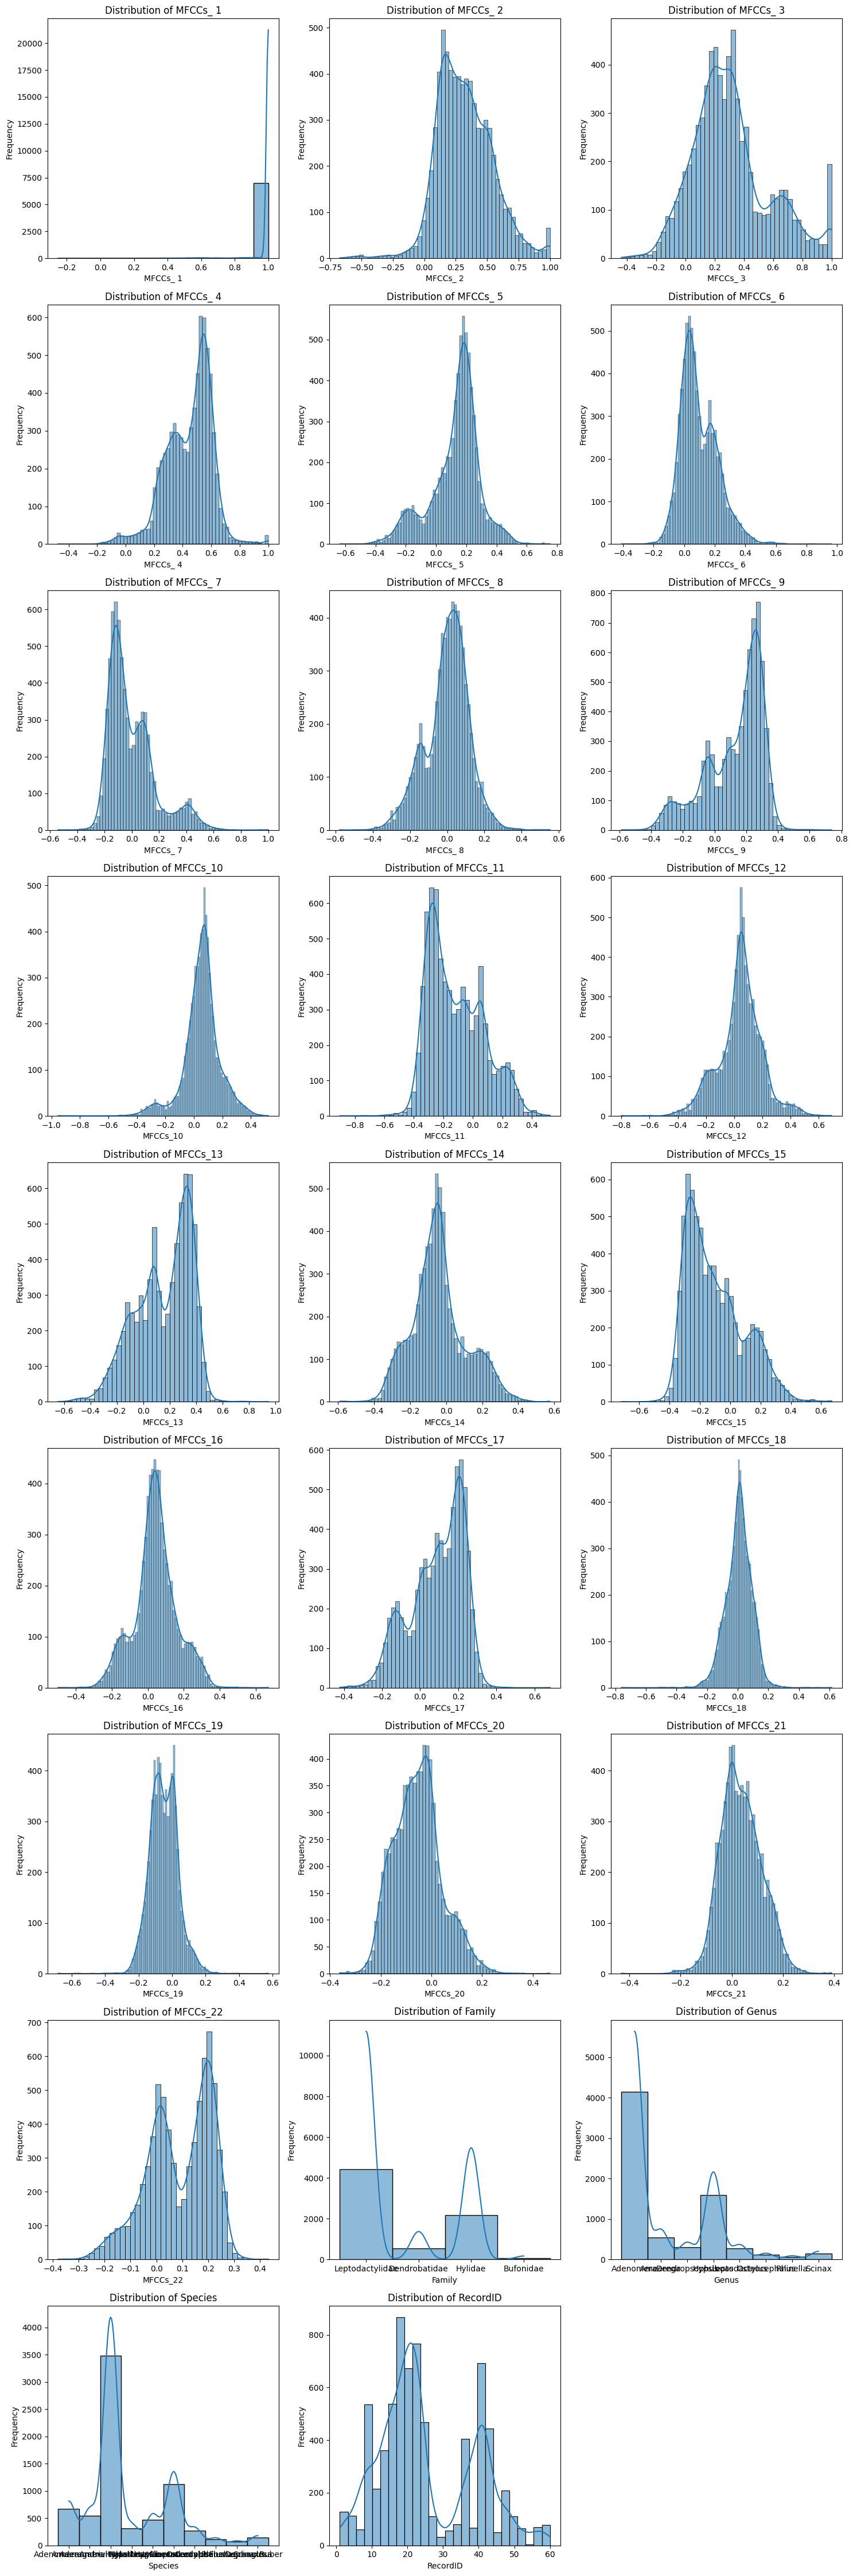

In [6]:
# plotting the distribution of each feature
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
# apply standard scaler to all the numerical columns
scaler = StandardScaler()
num_columns = df.select_dtypes(include=[np.number]).columns
df[num_columns] = scaler.fit_transform(df[num_columns])
df.drop(columns=['RecordID'], inplace=True)

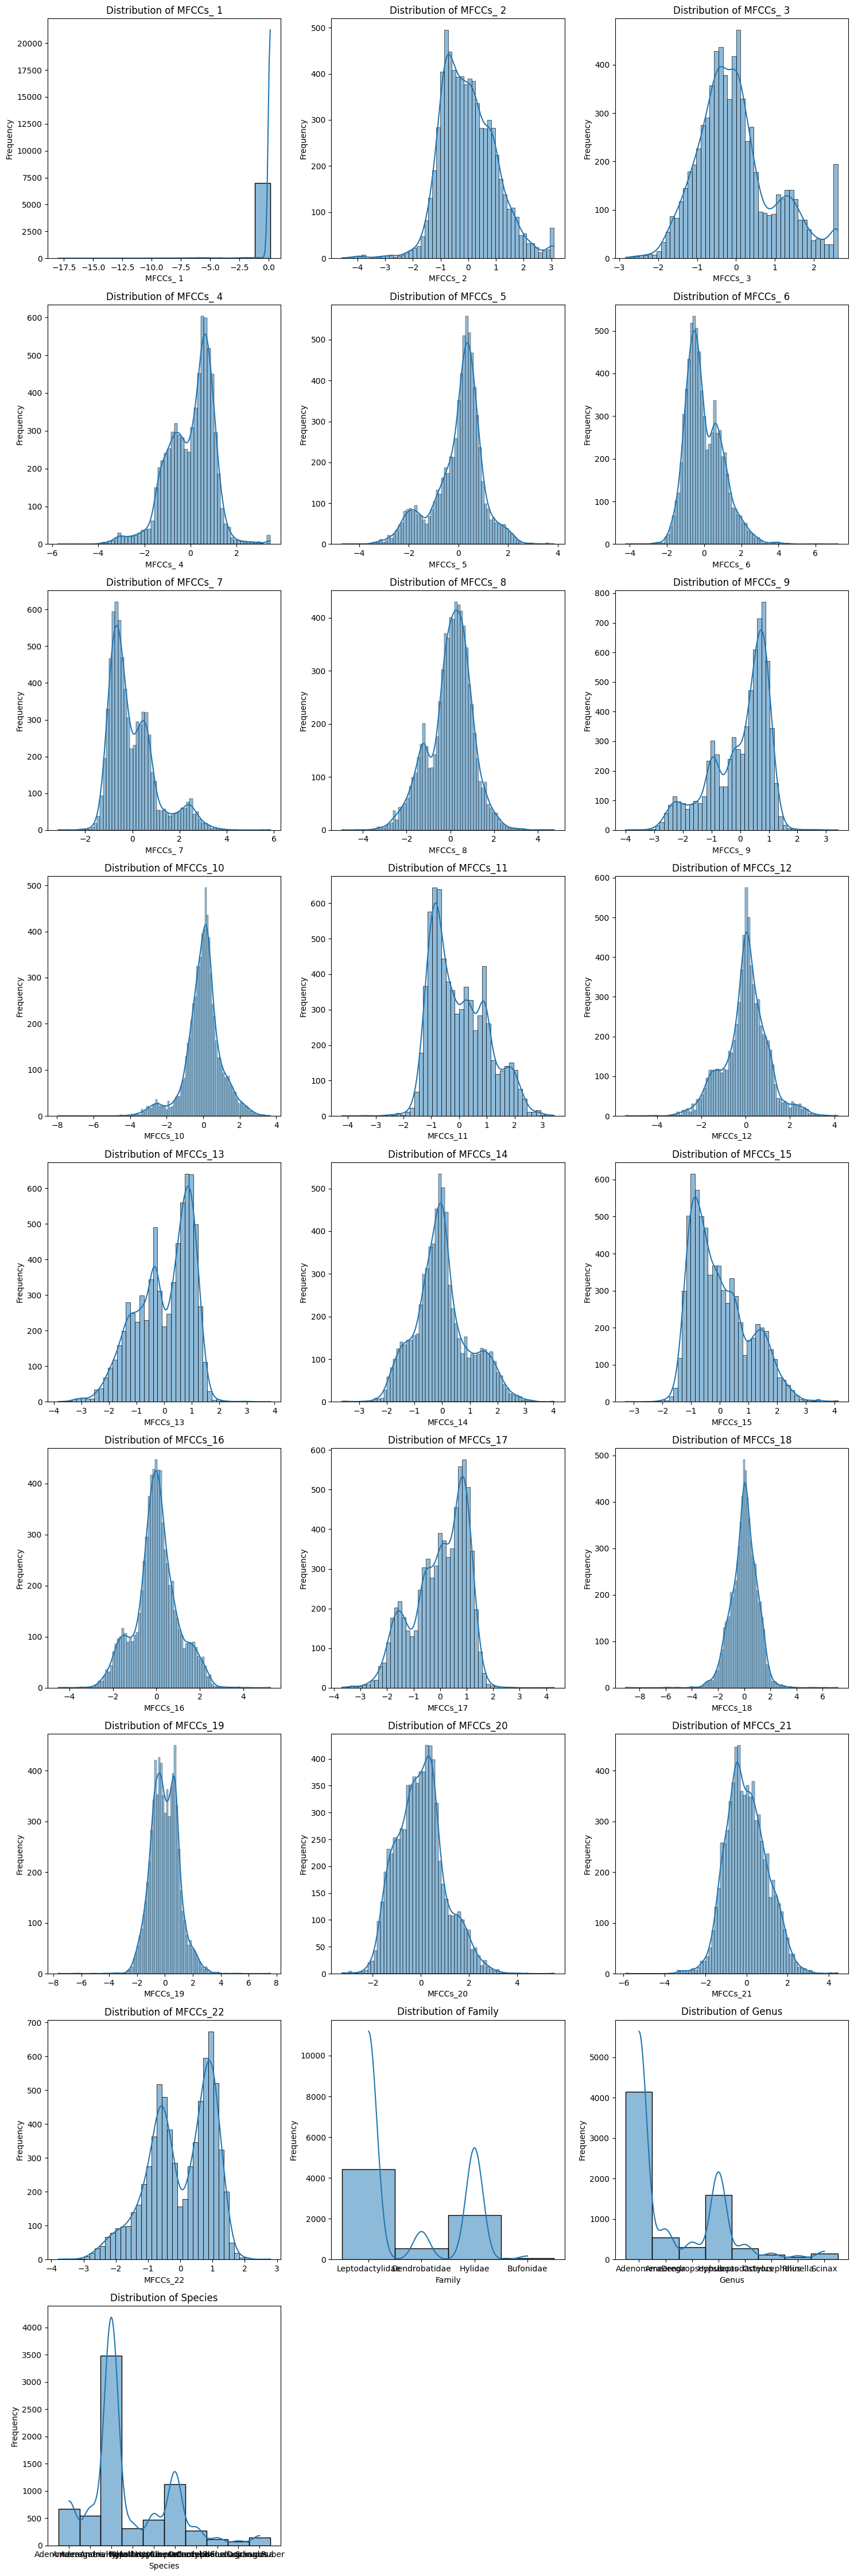

In [8]:
# obserivng the distribution of the data after applying standard scaler
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# calculating the z-scores for each numerical column, setting a high threshold of 4 to remove extreme outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
threshold = 4
outlier_counts = (z_scores > threshold).sum(axis=0)

outlier_summary = pd.DataFrame(outlier_counts, columns=['Number of Outliers'])
outlier_summary.index = df.select_dtypes(include=[np.number]).columns

print(outlier_summary)

          Number of Outliers
MFCCs_ 1                 116
MFCCs_ 2                   9
MFCCs_ 3                   0
MFCCs_ 4                   3
MFCCs_ 5                   3
MFCCs_ 6                  13
MFCCs_ 7                   4
MFCCs_ 8                   6
MFCCs_ 9                   0
MFCCs_10                   7
MFCCs_11                   1
MFCCs_12                   6
MFCCs_13                   0
MFCCs_14                   1
MFCCs_15                   3
MFCCs_16                   4
MFCCs_17                   1
MFCCs_18                  13
MFCCs_19                  10
MFCCs_20                   3
MFCCs_21                   5
MFCCs_22                   0


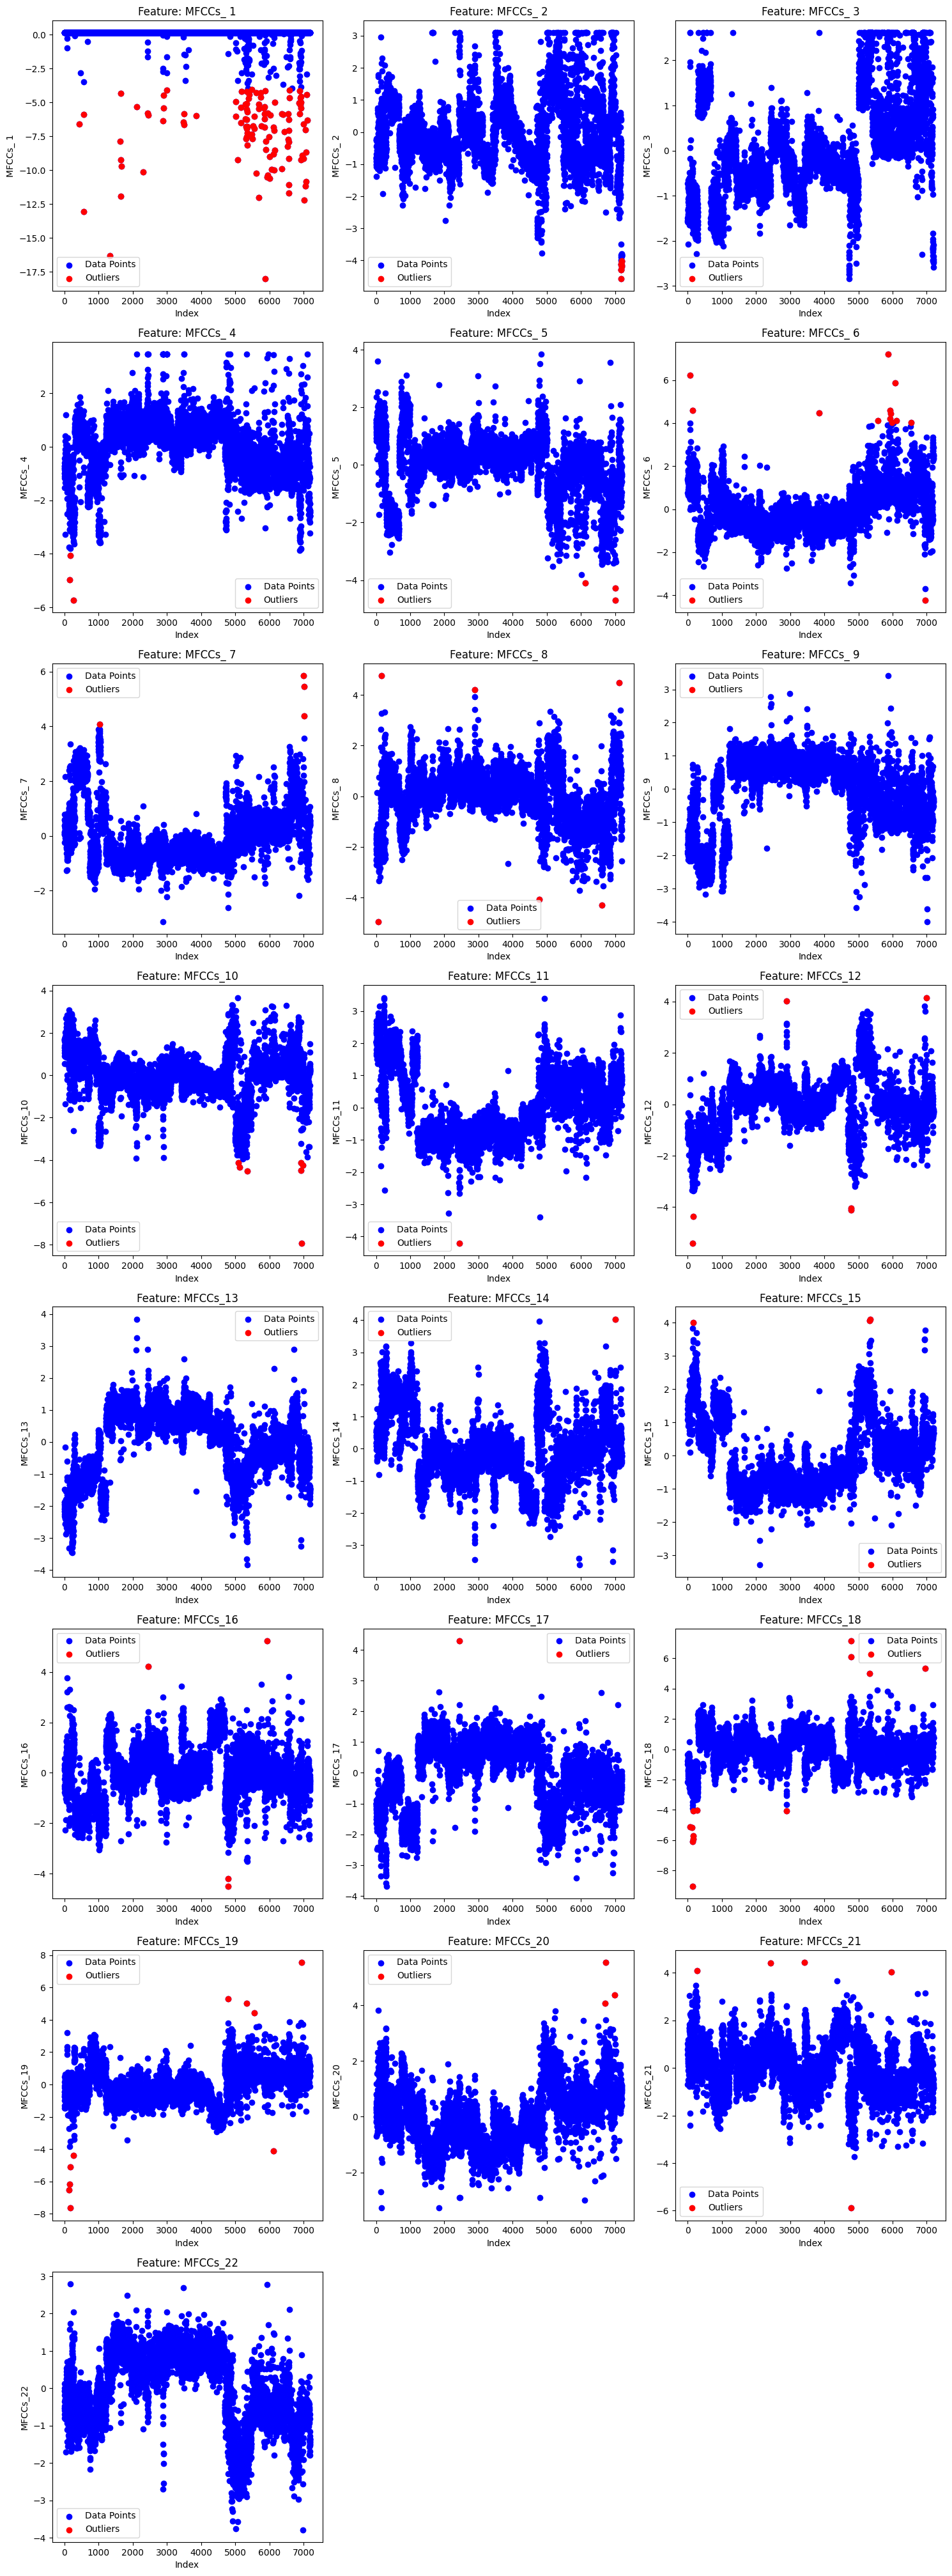

In [10]:
# plot the outliers in a scatter plot
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df.index, df[col], label='Data Points', color='blue')
    
    outlier_mask = abs(z_scores[col]) > threshold
    outliers = df[col][outlier_mask]
    plt.scatter(df.index[outlier_mask], outliers, label='Outliers', color='red')
    
    plt.title(f'Feature: {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    
plt.tight_layout()
plt.show()

In [11]:
# remove oulier points from the dataset
non_outlier_mask = np.all(z_scores <= threshold, axis=1)
df_cleaned = df[non_outlier_mask].reset_index(drop=True)
print(df.shape)
print(df_cleaned.shape)

(7195, 25)
(7035, 25)


In [12]:
# remove categorical columns
# this beacuse i tried and those were not helping me
df_cleaned = df_cleaned.select_dtypes(include=[np.number])
df_cleaned.head(10)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,0.146578,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,-1.287190,-1.672333,0.540390,...,-1.485897,0.796627,1.265956,-0.551081,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699
1,0.146578,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,-1.909853,-1.876612,0.903961,...,-1.959178,0.406743,1.412903,-0.250524,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036
2,0.146578,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,-2.079764,-1.940639,1.389091,...,-1.877203,0.590374,1.647536,0.345883,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297
3,0.146578,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,-1.667990,-1.264799,1.686808,...,-2.262481,0.181478,1.077586,-0.769643,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365
4,0.146578,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,-2.279164,-1.681117,1.655798,...,-2.172759,0.502823,1.710511,0.173262,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430
5,0.146578,-1.023975,-1.307857,-0.599452,1.336658,1.242737,0.138885,-1.834978,-1.430922,1.741708,...,-2.156317,0.339202,1.505230,0.109918,-1.225448,-1.626921,-1.478120,-0.194590,0.507517,-0.183621
6,0.146578,-1.380858,-1.416648,-0.796972,1.557318,0.673601,-0.234957,-2.166317,-1.649927,1.290648,...,-1.872583,0.434832,1.698626,0.190075,-0.980114,-0.742398,-0.442185,0.468465,0.356347,-0.352636
7,0.146578,-0.816205,-1.308815,-1.009448,0.937189,0.641773,0.041941,-1.573246,-1.601692,1.074581,...,-1.942935,0.198214,1.524554,0.280153,-1.047901,-0.660640,-0.086779,0.327323,0.412400,-0.535902
8,0.146578,-0.239014,-1.075665,-0.438251,1.588005,1.449444,0.581058,-1.490700,-1.598194,1.189566,...,-2.094944,-0.037644,0.885759,-0.619054,-1.516910,-1.420591,-1.301907,-0.693218,-0.500659,-0.690764
9,0.146578,-0.928559,-1.588027,-0.807416,1.458970,1.742628,0.159803,-2.526431,-1.963449,1.671537,...,-2.317341,0.537179,1.802895,0.094860,-1.012373,-0.711965,-0.749508,0.140486,0.665592,0.003707


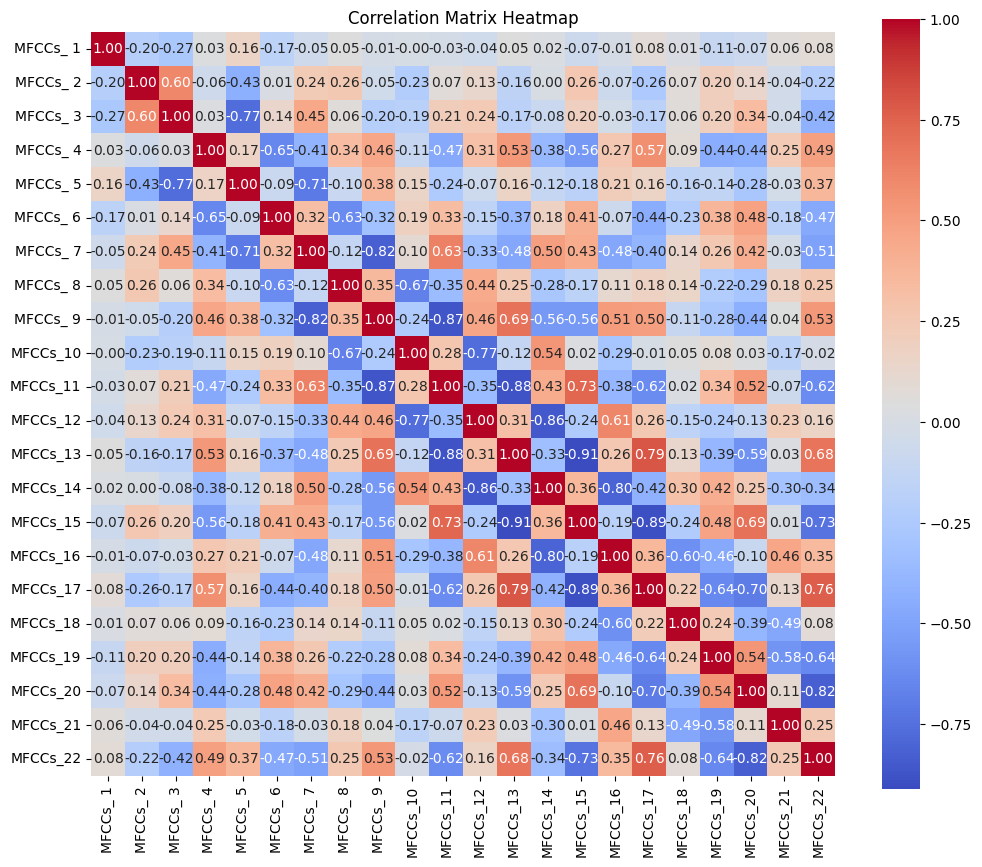

In [13]:
# Correlation Matrix Heatmap between the features
plt.figure(figsize=(12, 10))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
# here I did feature engineering just like I did in my previous part of the assignment
# a subtle threshold of 0.7 is used to identify the correlated features and then those are stored, removed, multiplied and then added to the dataset
threshold = 0.7
correlated_pairs = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1.0)]
new_columns = {}
columns_to_remove = set()  # To track which columns to remove

for i in range(correlated_pairs.shape[0]):
    for j in range(i + 1, correlated_pairs.shape[1]):
        if correlated_pairs.iloc[i, j] > threshold:
            col1 = correlated_pairs.index[i]
            col2 = correlated_pairs.columns[j]
            new_col_name = f"{col1}_x_{col2}"  # Name of the new column
            new_columns[new_col_name] = df_cleaned[col1] * df_cleaned[col2]
            columns_to_remove.add(col1)
            columns_to_remove.add(col2)

df_cleaned.drop(columns=columns_to_remove, inplace=True)

new_columns_df = pd.DataFrame(new_columns)
df_cleaned = pd.concat([df_cleaned, new_columns_df], axis=1)

print(df_cleaned.shape)
df_cleaned.columns.tolist()

(7035, 20)


['MFCCs_ 1',
 'MFCCs_ 2',
 'MFCCs_ 3',
 'MFCCs_ 4',
 'MFCCs_ 5',
 'MFCCs_ 6',
 'MFCCs_ 7',
 'MFCCs_ 8',
 'MFCCs_ 9',
 'MFCCs_10',
 'MFCCs_12',
 'MFCCs_14',
 'MFCCs_16',
 'MFCCs_18',
 'MFCCs_19',
 'MFCCs_20',
 'MFCCs_21',
 'MFCCs_11_x_MFCCs_15',
 'MFCCs_13_x_MFCCs_17',
 'MFCCs_17_x_MFCCs_22']

#### K-MEANS CLUSTERING

In the K-Means Clustering, following things have been done:<br/>
    - Finding the optimal number of clusters using the Elbow Method and then verifying it using the Silhouette Score plot for the same<br/>
    - Comparing the random initialization of the K-Means Clustering with the K-Means++ initialization for the optimal clusters using the Silhouette Score<br/>
    - Plotting the clusters in 2D space using the PCA<br/>

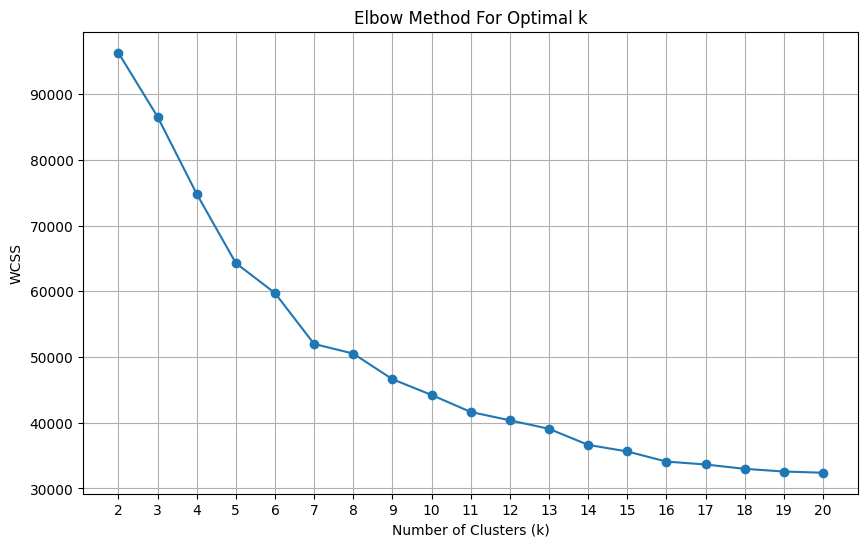

In [15]:
# analyzing the elbow plot to find the optimal number of clusters
cluster_range = range(2,21)
wcss = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_cleaned.select_dtypes(include=[np.number]))
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(cluster_range)
plt.grid()
plt.show()

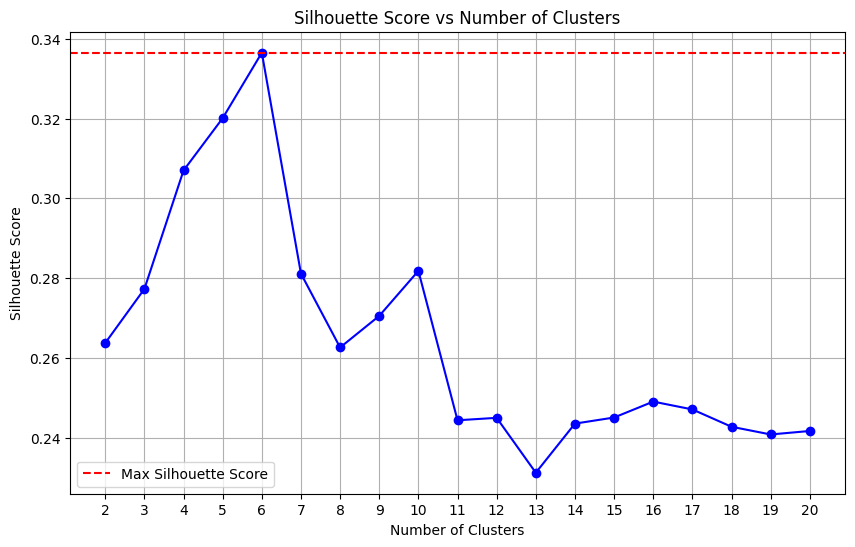

In [16]:
# comparing the silhouette scores for different number of clusters
silhouette_scores = []

for optimal_k in range(2, 21):
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(df_cleaned.select_dtypes(include=[np.number]))
    silhouette_avg = silhouette_score(df_cleaned.select_dtypes(include=[np.number]), clusters)
    silhouette_scores.append(silhouette_avg)
    
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='-', color='blue')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 21))
plt.grid()
plt.axhline(y=max(silhouette_scores), color='r', linestyle='--', label='Max Silhouette Score')
plt.legend()
plt.show()

In [17]:
# comparing random and kmeans++ initialization through the silhouette score
optimal_k = 6
kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=42)
clusters_random = kmeans_random.fit_predict(df_cleaned.select_dtypes(include=[np.number]))
silhouette_avg_random = silhouette_score(df_cleaned.select_dtypes(include=[np.number]), clusters_random)

print(f'Silhouette Score (Random Initialization): {silhouette_avg_random}')

kmeans_plus_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters_plus_plus = kmeans_plus_plus.fit_predict(df_cleaned.select_dtypes(include=[np.number]))
silhouette_avg_plus_plus = silhouette_score(df_cleaned.select_dtypes(include=[np.number]), clusters_plus_plus)

print(f'Silhouette Score (KMeans++ Initialization): {silhouette_avg_plus_plus}')

Silhouette Score (Random Initialization): 0.2688431410941967
Silhouette Score (KMeans++ Initialization): 0.33649080750501986


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9592\1921701553.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_clusters)


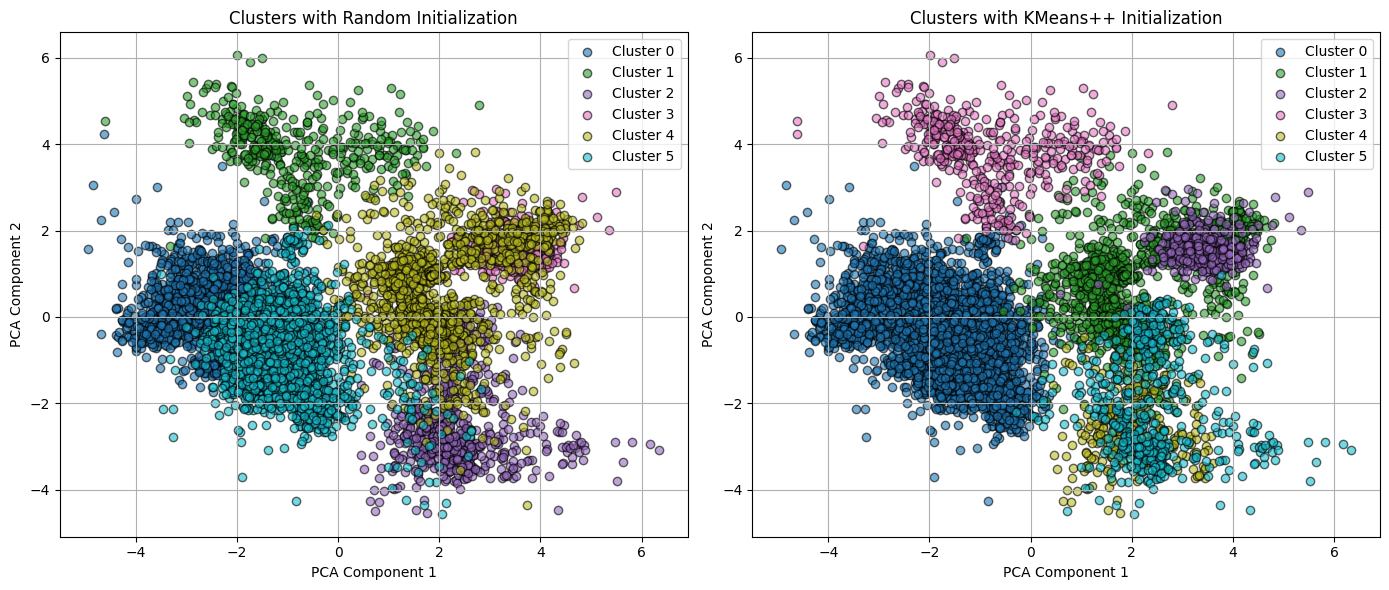

In [18]:
# for visualization of clustering in 2D we use PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cleaned.select_dtypes(include=[np.number]))

df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
df_pca['Cluster (Random)'] = clusters_random
df_pca['Cluster (KMeans++)'] = clusters_plus_plus

num_clusters = optimal_k 
colors = plt.cm.get_cmap('tab10', num_clusters)
color_list = [colors(i) for i in range(num_clusters)]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for i in range(num_clusters):
    plt.scatter(df_pca[df_pca['Cluster (Random)'] == i]['PCA1'], 
                df_pca[df_pca['Cluster (Random)'] == i]['PCA2'], 
                color=color_list[i], 
                label=f'Cluster {i}', 
                edgecolor='k', alpha=0.6)
plt.title('Clusters with Random Initialization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(num_clusters):
    plt.scatter(df_pca[df_pca['Cluster (KMeans++)'] == i]['PCA1'], 
                df_pca[df_pca['Cluster (KMeans++)'] == i]['PCA2'], 
                color=color_list[i], 
                label=f'Cluster {i}', 
                edgecolor='k', alpha=0.6)
plt.title('Clusters with KMeans++ Initialization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### FEATURE IMPORTANCE, ADDITIONAL METRICS AND COMPARISON OF THE MODELS

In this section, following things have been done:<br/>
    - Finding the feature importance for both the kinds of initialisation<br/>
    - Using the Davies Bouldin Score and Calinski Harabasz Score for different number of clusters, visualizing them using a line plot<br/>
    - Comparing the K-Means Clustering with the Agglomerative Clustering and DBSCAN Clustering using the Silhouette Score, Davies Bouldin Score and Calinski Harabasz Score<br/>

In [19]:
# for feature importance
centroids_random = kmeans_random.cluster_centers_

mean_data = df_cleaned.select_dtypes(include=[np.number]).mean().values

feature_importance_random = np.abs(centroids_random - mean_data).sum(axis=0)

importance_df_random = pd.DataFrame({
    'Feature': df_cleaned.select_dtypes(include=[np.number]).columns,
    'Importance': feature_importance_random
})
importance_df_random = importance_df_random.sort_values(by='Importance', ascending=False)
print(importance_df_random)

                Feature  Importance
10             MFCCs_12    5.901270
11             MFCCs_14    5.592815
4              MFCCs_ 5    5.362442
8              MFCCs_ 9    5.344195
2              MFCCs_ 3    5.022204
6              MFCCs_ 7    4.755284
9              MFCCs_10    4.706726
5              MFCCs_ 6    4.314496
12             MFCCs_16    4.307461
19  MFCCs_17_x_MFCCs_22    4.288046
15             MFCCs_20    4.242795
18  MFCCs_13_x_MFCCs_17    4.147790
3              MFCCs_ 4    4.001246
7              MFCCs_ 8    3.929641
14             MFCCs_19    3.863909
13             MFCCs_18    3.727870
1              MFCCs_ 2    3.429509
17  MFCCs_11_x_MFCCs_15    2.898155
16             MFCCs_21    2.778633
0              MFCCs_ 1    0.240078


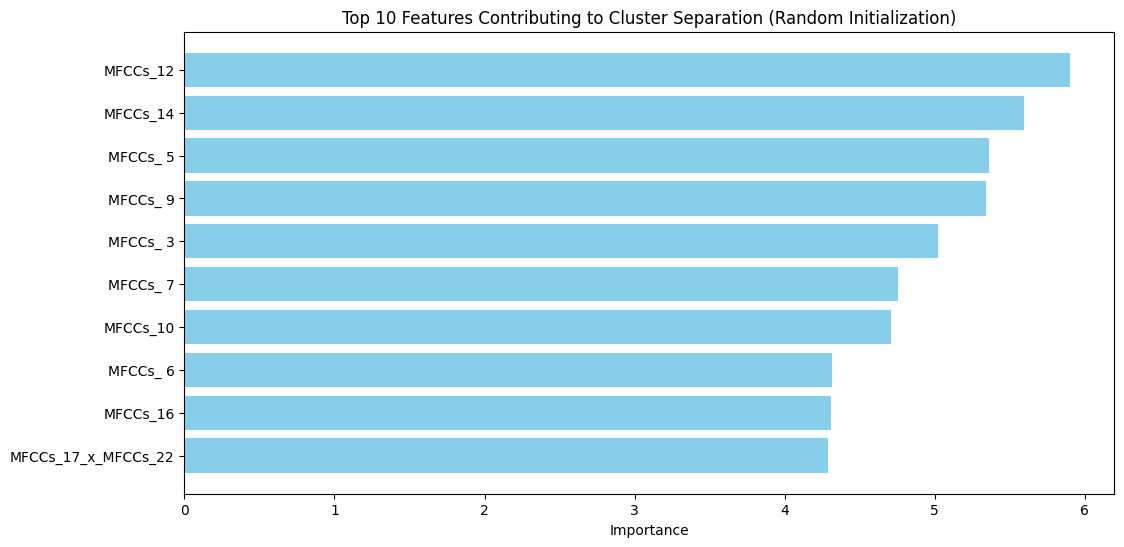

In [20]:
# plotting top 10 features using bar graph
plt.figure(figsize=(12, 6))
plt.barh(importance_df_random['Feature'][:10], importance_df_random['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features Contributing to Cluster Separation (Random Initialization)')
plt.gca().invert_yaxis()
plt.show()

In [21]:
# similar thing for kmeans++
centroids_plus_plus = kmeans_plus_plus.cluster_centers_
mean_data_plus_plus = df_cleaned.select_dtypes(include=[np.number]).mean().values

feature_importance_plus_plus = np.abs(centroids_plus_plus - mean_data_plus_plus).sum(axis=0)

importance_df_plus_plus = pd.DataFrame({
    'Feature': df_cleaned.select_dtypes(include=[np.number]).columns,
    'Importance': feature_importance_plus_plus
})

importance_df_plus_plus = importance_df_plus_plus.sort_values(by='Importance', ascending=False)
print(importance_df_plus_plus)

                Feature  Importance
10             MFCCs_12    6.775213
11             MFCCs_14    6.010341
4              MFCCs_ 5    6.007039
2              MFCCs_ 3    5.736697
9              MFCCs_10    5.568642
8              MFCCs_ 9    5.409315
18  MFCCs_13_x_MFCCs_17    5.213039
7              MFCCs_ 8    4.574888
15             MFCCs_20    4.556041
5              MFCCs_ 6    4.439541
6              MFCCs_ 7    4.307535
12             MFCCs_16    4.257227
19  MFCCs_17_x_MFCCs_22    4.229177
14             MFCCs_19    4.128349
3              MFCCs_ 4    3.975486
17  MFCCs_11_x_MFCCs_15    3.911115
16             MFCCs_21    3.693636
1              MFCCs_ 2    3.458516
13             MFCCs_18    3.457471
0              MFCCs_ 1    0.246835


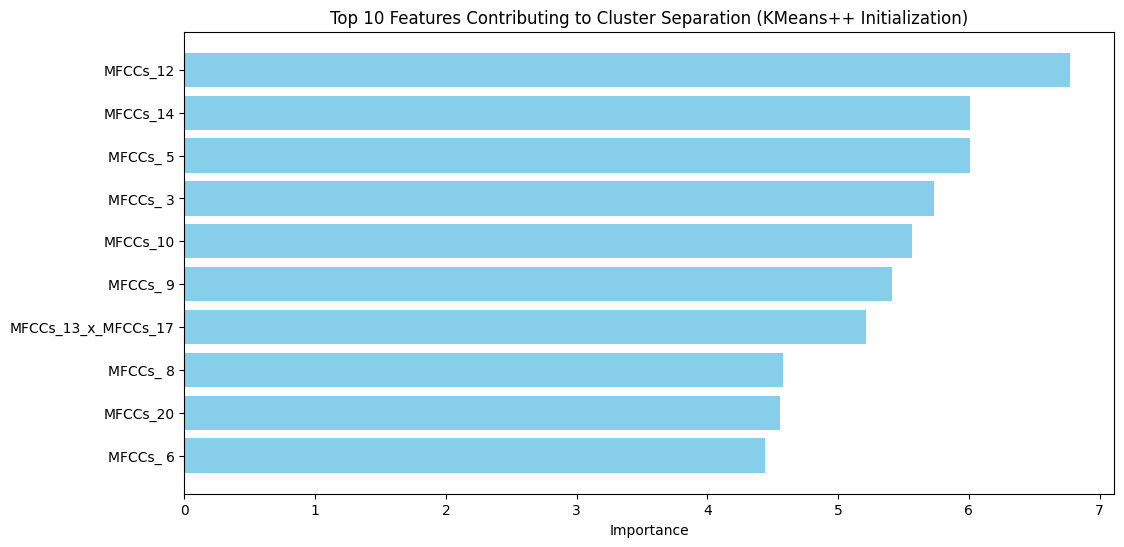

In [22]:
plt.figure(figsize=(12, 6))
plt.barh(importance_df_plus_plus['Feature'][:10], importance_df_plus_plus['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features Contributing to Cluster Separation (KMeans++ Initialization)')
plt.gca().invert_yaxis()
plt.show()

In [23]:
# analyzing the silhouette, DB and CH scores for different number of clusters, plotting and analysing them, used kmeans++ initialization here
cluster_range = range(2, 21)
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []


for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(df_cleaned.select_dtypes(include=[np.number]))

    silhouette_avg = silhouette_score(df_cleaned.select_dtypes(include=[np.number]), clusters)
    silhouette_scores.append(silhouette_avg)

    db_index = davies_bouldin_score(df_cleaned.select_dtypes(include=[np.number]), clusters)
    davies_bouldin_scores.append(db_index)

    ch_index = calinski_harabasz_score(df_cleaned.select_dtypes(include=[np.number]), clusters)
    calinski_harabasz_scores.append(ch_index)

metrics_df = pd.DataFrame({
    'Clusters': cluster_range,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': davies_bouldin_scores,
    'Calinski-Harabasz Index': calinski_harabasz_scores
})

print(metrics_df)

    Clusters  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
0          2          0.263765              1.693648              2073.187872
1          3          0.277302              1.557241              1548.526399
2          4          0.306986              1.376432              1561.385284
3          5          0.320096              1.271582              1650.798620
4          6          0.336491              1.283074              1528.499492
5          7          0.281143              1.302148              1637.949763
6          8          0.262638              1.329607              1473.666397
7          9          0.270557              1.283723              1470.080747
8         10          0.281840              1.227325              1419.897856
9         11          0.244401              1.318028              1400.594883
10        12          0.245013              1.378476              1333.399161
11        13          0.231262              1.440928            

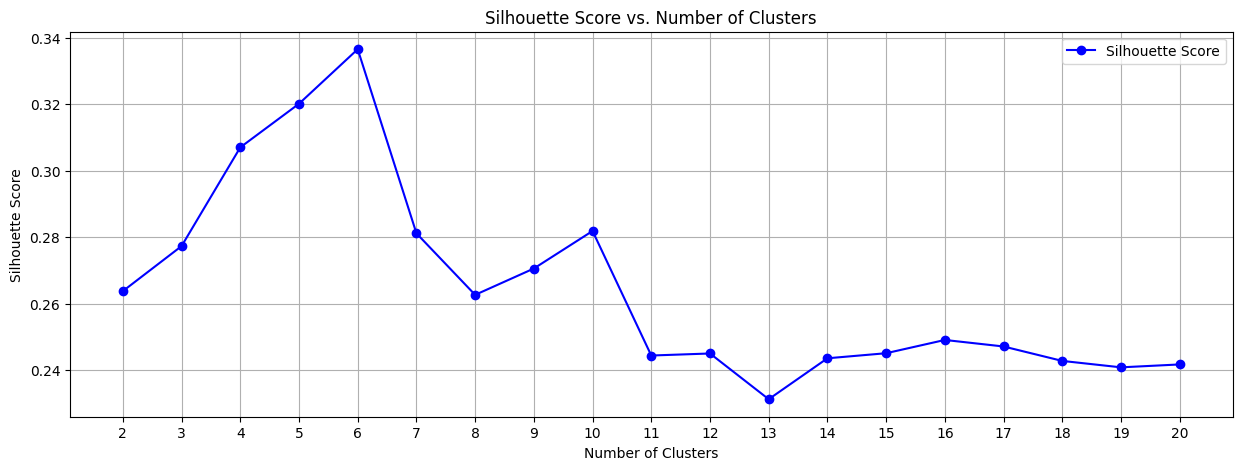

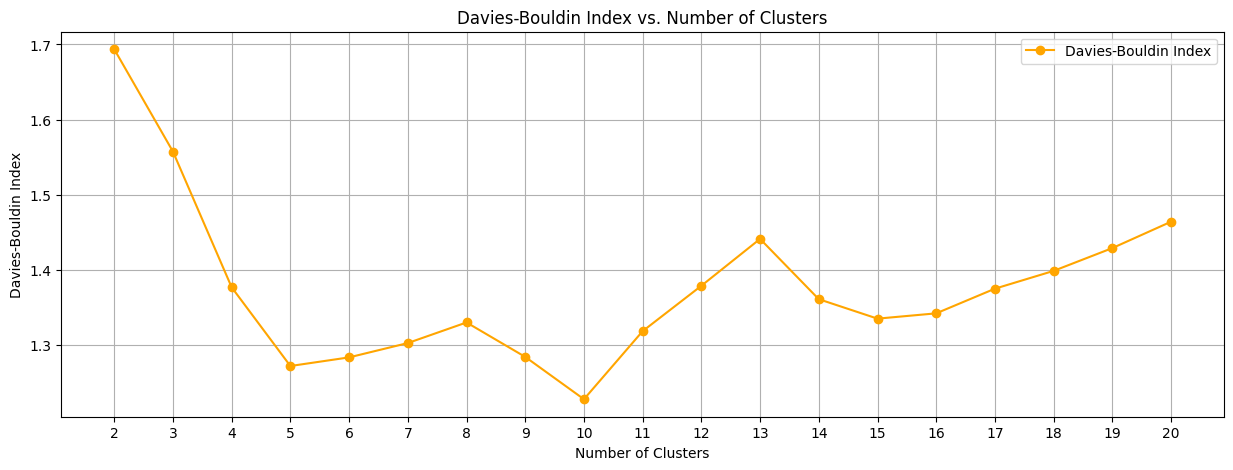

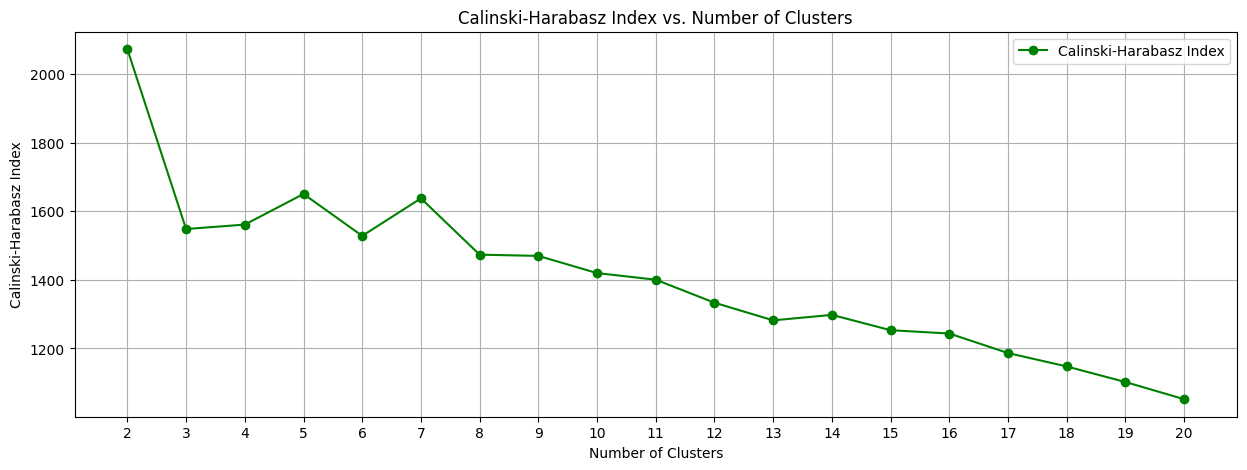

In [24]:
# plotting the metrics
plt.figure(figsize=(15, 5))
plt.plot(metrics_df['Clusters'], metrics_df['Silhouette Score'], marker='o', label='Silhouette Score', color='blue')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(metrics_df['Clusters'])
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(metrics_df['Clusters'], metrics_df['Davies-Bouldin Index'], marker='o', label='Davies-Bouldin Index', color='orange')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(metrics_df['Clusters'])
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(metrics_df['Clusters'], metrics_df['Calinski-Harabasz Index'], marker='o', label='Calinski-Harabasz Index', color='green')
plt.title('Calinski-Harabasz Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.xticks(metrics_df['Clusters'])
plt.legend()
plt.grid()
plt.show()

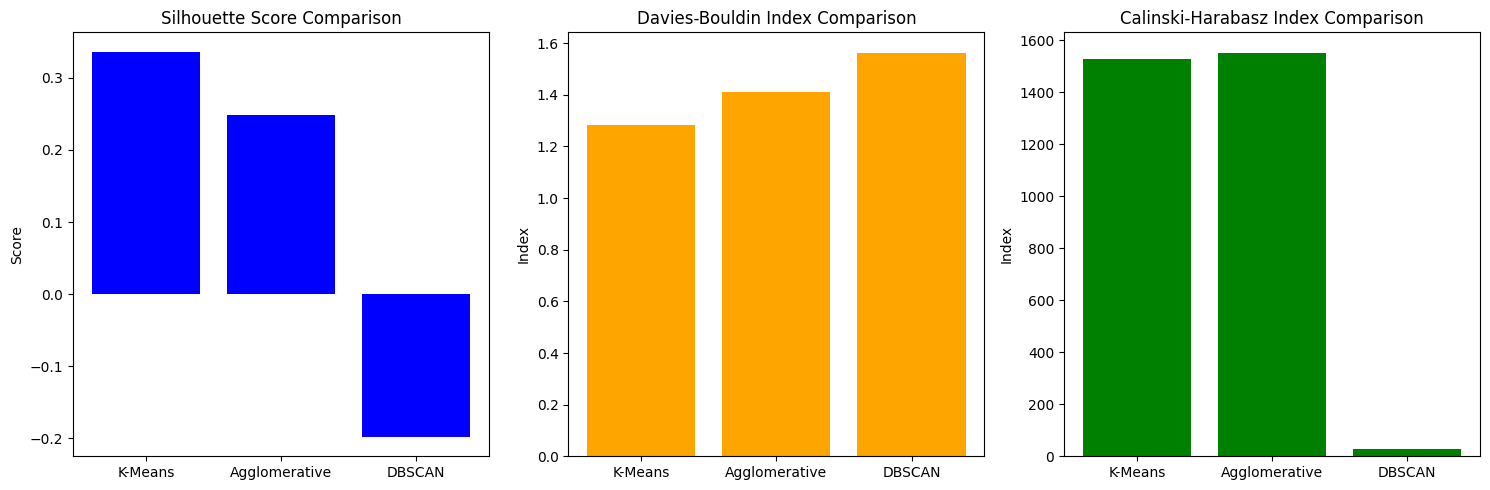

,Clustering Method,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,K-Means,0.336491,1.283074,1528.499492
1,Agglomerative,0.248915,1.410777,1553.409646
2,DBSCAN,-0.198195,1.563847,26.733660


In [25]:
# using Agglomerative Clustering and DBSCAN to compare the clustering algorithms with KMeans
# using 3 metrics to compare the clustering algorithms
X = df_cleaned.select_dtypes(include=[np.number])

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

agglo = AgglomerativeClustering(n_clusters=optimal_k)
agglo_clusters = agglo.fit_predict(X)

dbscan = DBSCAN()
dbscan_clusters = dbscan.fit_predict(X)

metrics_df = pd.DataFrame({
    'Clustering Method': ['K-Means', 'Agglomerative', 'DBSCAN'],
    'Silhouette Score': [
        silhouette_score(X, kmeans_clusters),
        silhouette_score(X, agglo_clusters),
        silhouette_score(X, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else -1
    ],
    'Davies-Bouldin Index': [
        davies_bouldin_score(X, kmeans_clusters),
        davies_bouldin_score(X, agglo_clusters),
        davies_bouldin_score(X, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else -1
    ],
    'Calinski-Harabasz Index': [
        calinski_harabasz_score(X, kmeans_clusters),
        calinski_harabasz_score(X, agglo_clusters),
        calinski_harabasz_score(X, dbscan_clusters) if len(set(dbscan_clusters)) > 1 else -1
    ]
})

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(metrics_df['Clustering Method'], metrics_df['Silhouette Score'], color='blue')
plt.title('Silhouette Score Comparison')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.bar(metrics_df['Clustering Method'], metrics_df['Davies-Bouldin Index'], color='orange')
plt.title('Davies-Bouldin Index Comparison')
plt.ylabel('Index')

plt.subplot(1, 3, 3)
plt.bar(metrics_df['Clustering Method'], metrics_df['Calinski-Harabasz Index'], color='green')
plt.title('Calinski-Harabasz Index Comparison')
plt.ylabel('Index')

plt.tight_layout()
plt.show()

metrics_df